# team 16
# Unicorn companies EDA



<div>
<img src="https://raw.githubusercontent.com/ronro5353/DataAriel/main/unicorn.jpg" width="800"/>
</div>

# What is Unicorn
A unicorn, in an investment context, is a tech startup that is assessed at a valuation of  1 billion dollar or more; companies valued at more than 10 billion dollar are sometimes called decacorns and those valued over 100 billion dollar are called super unicorns.

According to March 2022 the number of active unicorn companies 1037.


In [43]:
name_student_1 = "Roee Brown"
name_student_2 = "Ron Ohayon"
name_student_3 = "Aharon Shnevise"
name_student_4 = "Bnaya Daniel"

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl

# **The dataset:**
The dataset contains information about unicorn companies until March 2022


In [3]:
url='https://raw.githubusercontent.com/ronro5353/DataAriel/main/Unicorn_Companies.csv'
unicorn_df = pd.read_csv(url)
unicorn_df.head()

,Company,Valuation ($B),Date Joined,Country,City,Industry,Select Inverstors,Founded Year,Total Raised,Financial Stage,Investors Count,Deal Terms,Portfolio Exits
0,Bytedance,$140,4/7/2017,China,Beijing,Artificial intelligence,"Sequoia Capital China, SIG Asia Investments, S...",2012,$7.44B,IPO,28,8,5
1,SpaceX,$100.3,12/1/2012,United States,Hawthorne,Other,"Founders Fund, Draper Fisher Jurvetson, Rothen...",2002,$6.874B,None,29,12,None
2,Stripe,$95,1/23/2014,United States,San Francisco,Fintech,"Khosla Ventures, LowercaseCapital, capitalG",2010,$2.901B,Asset,39,12,1
3,Klarna,$45.6,12/12/2011,Sweden,Stockholm,Fintech,"Institutional Venture Partners, Sequoia Capita...",2005,$3.472B,Acquired,56,13,1
4,Epic Games,$42,10/26/2018,United States,Cary,Other,"Tencent Holdings, KKR, Smash Ventures",1991,$4.377B,Acquired,25,5,2


There are 13 columns in the dataset providing the information about the unicorn company.

1.Company: The name of the company

2.Valuation ($B): Economic value of the company in the digit of billion US dollar.

3.Date Joined: The date that company become the unicorn company.

4.Country: The country where company was established

5.City: The city where company was established

6.Industry: The industry of company

7.Select Inverstors: List of selected companies that invest during founding stage in the unicorn company

8.Founded Year: The launch year of the company.

9.Total Raised: The full deal size of an investment.

10.Financial Stage: The current financial stage of the company

11.Investors count: The total number of investors

12.Deal Terms

13.Portfolio Exits







# Data Cleaning and Transformation

In [4]:
unicorn_df['Valuation ($B)'] = unicorn_df['Valuation ($B)'].str.replace('$','',regex=True)
unicorn_df['Valuation ($B)'] = unicorn_df['Valuation ($B)'].astype('float')
unicorn_df['Total Raised'] = unicorn_df['Total Raised'].str.replace('$','',regex=True)
unicorn_df['Total Raised'] = unicorn_df['Total Raised'].str.replace('B','')
unicorn_df['Total Raised'] = unicorn_df['Total Raised'].str.replace('M','')
unicorn_df['Total Raised'] = unicorn_df['Total Raised'].str.replace('K','')
unicorn_df['Total Raised'] = unicorn_df['Total Raised'].replace('None',np.nan)
unicorn_df['Investors Count'] = unicorn_df['Investors Count'].replace('None', np.nan)
unicorn_df['Total Raised'] = unicorn_df['Total Raised'].astype('float')
unicorn_df.loc[unicorn_df['Industry'] == 'Finttech', 'Industry'] = 'Fintech'
unicorn_df.loc[unicorn_df['Industry'] == 'Artificial intelligence', 'Industry'] = 'Artificial Intelligence'
sns.set_style("darkgrid")


# Data Visualization

Lets warm up...


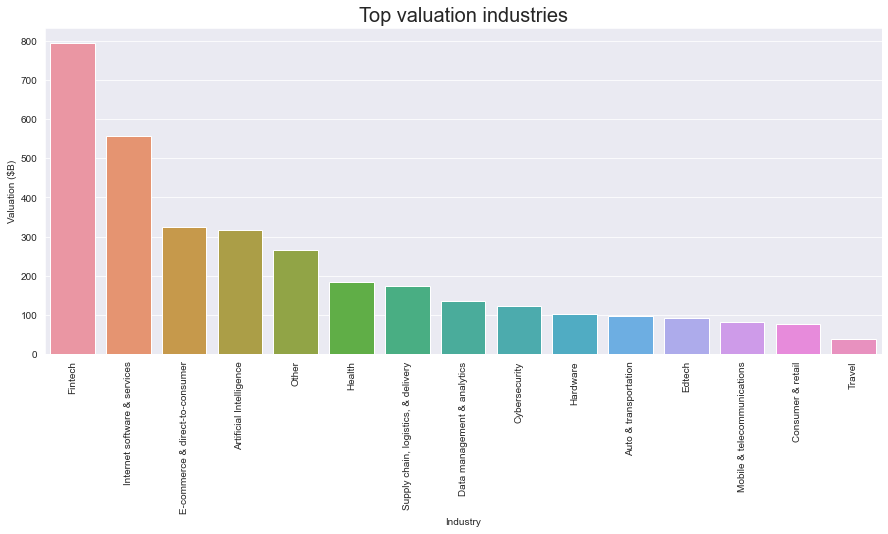

In [6]:
industries = unicorn_df['Industry'].value_counts()[:15]
industries = industries.index.tolist()
unicorn_df = unicorn_df[unicorn_df['Industry'].isin(industries)]
industry_val = unicorn_df.groupby('Industry')[['Valuation ($B)']].sum().reset_index().sort_values('Valuation ($B)', ascending= False)
plt.figure(figsize= (15, 6))
sns.barplot(x= 'Industry',y= 'Valuation ($B)',data= industry_val)           
plt.ylabel('Valuation ($B)')
plt.xticks(rotation=90)
plt.title('Top valuation industries',fontsize=20)
plt.show()

The most valuable industry is "Financial Technology" 

# What is Fintech?
<div>
<img src="https://raw.githubusercontent.com/ronro5353/DataAriel/main/Fintech2.jpeg" width="800"/>
</div>

# Lets talk about years
1.In what years most of the companies were founded

2.In what years most companies became unicorn?

3.And the most important thing,how much time does it take to beacame a unicorn?






In [48]:
unicorn_df['Date Joined'] =unicorn_df['Date Joined'].replace('None',np.nan)
unicorn_df['Date Joined'] = pd.to_datetime(unicorn_df['Date Joined'], format='%m/%d/%Y')

unicorn_df['Founded Year'] = unicorn_df['Founded Year'].replace('None',np.nan)
unicorn_df['Founded Year'] = unicorn_df['Founded Year'].astype('float')

unicorn_df['Year Joined'] = unicorn_df['Date Joined'].dt.year
unicorn_df['Years To Unicorn'] = unicorn_df['Year Joined'] - unicorn_df['Founded Year']
unicorn_df.tail()

,Company,Valuation ($B),Date Joined,Country,City,Industry,Select Inverstors,Founded Year,Total Raised,Financial Stage,Investors Count,Deal Terms,Portfolio Exits,Year Joined,Years To Unicorn
1032,Timescale,1.0,2022-02-22,United States,New York,Internet software & services,"New Enterprise Associates, Benchmark, Two Sigm...",2015.0,181.06,None,7,2,None,2022,7.0
1033,Scalapay,1.0,2022-02-23,Italy,Milan,Fintech,"Fasanara Capital, Tiger Global Management, Bal...",2019.0,700.00,None,10,2,None,2022,3.0
1034,Omada Health,1.0,2022-02-23,United States,San Francisco,Health,"U.S. Venture Partners, dRx Capital, Andreessen...",2011.0,449.72,None,30,6,None,2022,11.0
1035,BlueVoyant,1.0,2022-02-23,United States,New York,Cybersecurity,"8VC, Liberty Strategic Capital, Eden Global Pa...",2017.0,525.50,None,6,2,None,2022,5.0
1036,Veev,1.0,2022-02-24,United States,San Mateo,Internet software & services,"Zeev Ventures, Bond, Fifth Wall Ventures",2008.0,604.50,None,11,1,None,2022,14.0


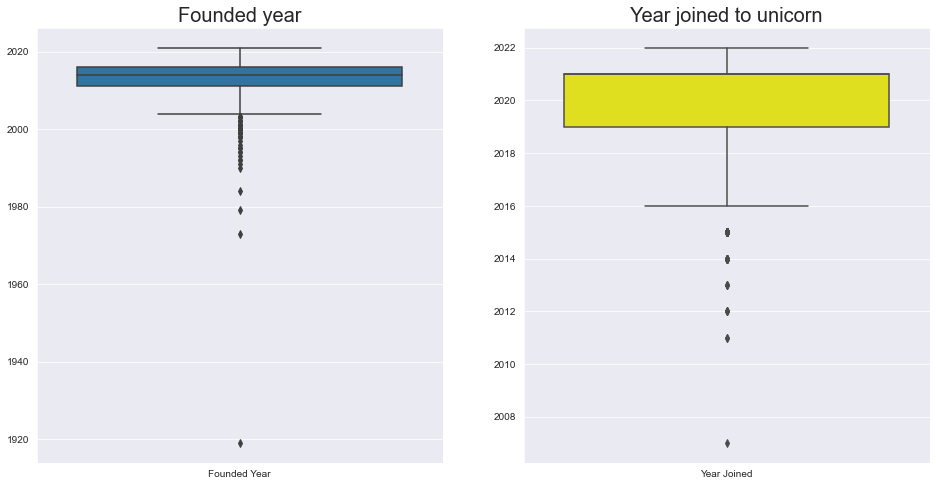

In [49]:
fig, ax = plt.subplots(nrows=1 ,ncols=2)
sns.boxplot(data=unicorn_df[['Founded Year']],ax=ax[0])
sns.boxplot(data=unicorn_df[['Year Joined']],ax = ax[1],color='Yellow')
ax[0].set_title("Founded year",fontsize=20)
ax[1].set_title("Year joined to unicorn",fontsize=20)
plt.show()

As we can see in the boxplot of "Founded year" most of the companies have founded between 2010-2018
and in the boxplot of  "year joined to unicorn" most of the companies have joined between 2019-2021.

Note that most of the joinings have happened in recent years!


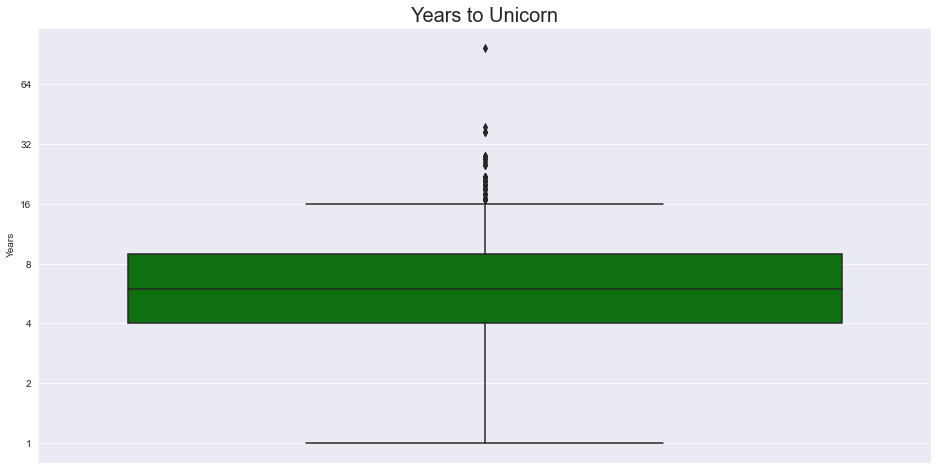

In [50]:
ax = plt.subplot()
sns.boxplot(y=unicorn_df.loc[unicorn_df["Years To Unicorn"] > 0,"Years To Unicorn"],color='Green')
plt.yscale('log',base=2)
ax.yaxis.set_major_formatter(mpl.ticker.FormatStrFormatter("%d"))
plt.title("Years to Unicorn",fontsize=20)
ax.set_ylabel("Years")
plt.show()

The distribution of years to become unicorn companies graph shows that most companies use 4 - 12 years to become the unicorn companies.


<div>
<img src="https://raw.githubusercontent.com/ronro5353/DataAriel/main/18119218_826340724209225_586800860337657134_n.png" width="300"/>
</div>



# investors count

How does investor count affect valuation?


<AxesSubplot:xlabel='Investors Count', ylabel='Valuation ($B)'>

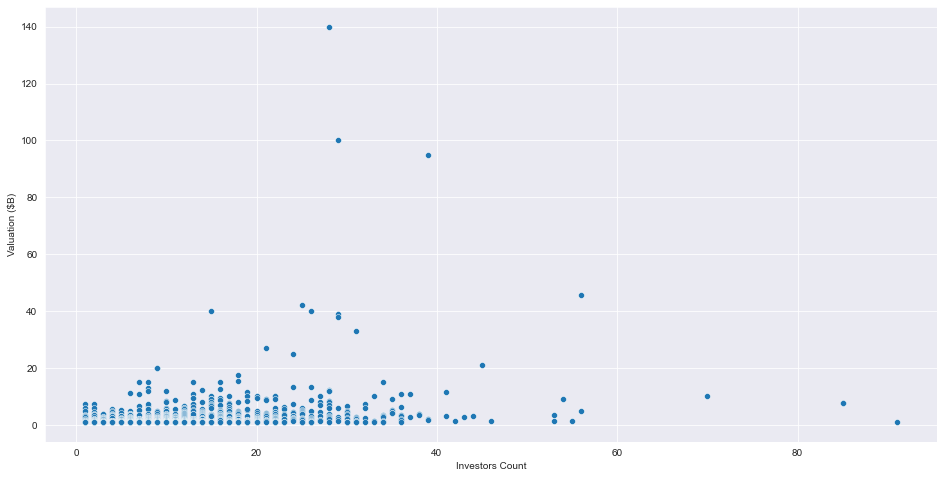

In [51]:
unicorn_df['Investors Count'] = unicorn_df['Investors Count'].astype('float')
sns.scatterplot(data = unicorn_df, x = 'Investors Count', y = 'Valuation ($B)')

As we can see there is a lot of companies between 0 to 40 investors that them value is between 0 to 20 so the there is no significant effect on the value of the company.


# Countries

in this part we will talk about countries with unicorn companies.

Text(0, 0.5, 'Valuation ($B)')

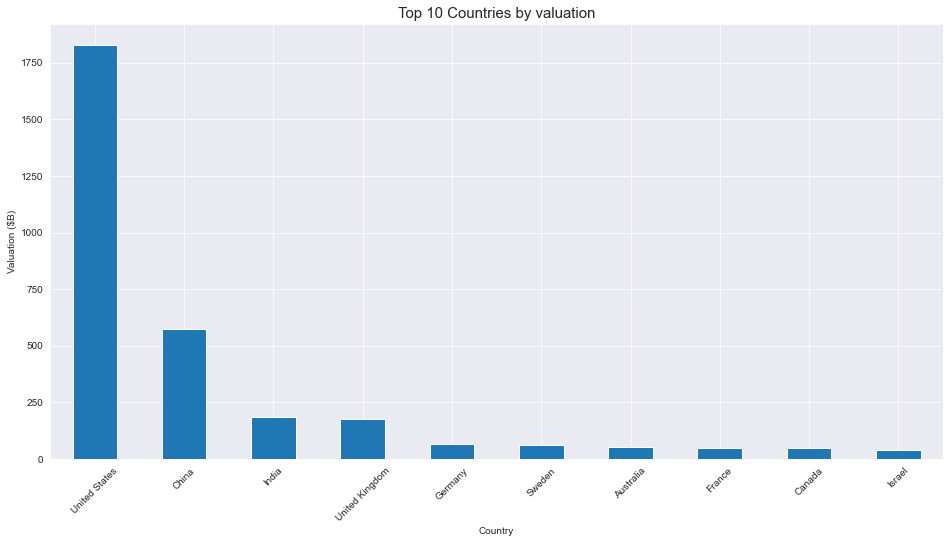

In [52]:
plt.rcParams['figure.figsize'] = (16,8)
plt.title('Top 10 Countries by valuation',fontsize=15)
plt.xticks(rotation=60)
country_df = unicorn_df.groupby("Country")
country_df["Valuation ($B)"].sum().sort_values(ascending=False)[:10].plot(kind='bar')
plt.xticks(rotation=45)
plt.ylabel('Valuation ($B)')



Text(0.5, 1.0, 'Top 10 Countries by amount of companies')

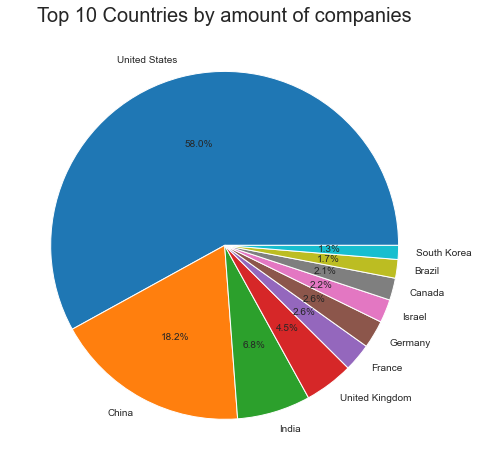

In [53]:
pie_data=unicorn_df["Country"].value_counts()[:10]
pie_data.plot.pie(autopct='%1.1f%%')
plt. ylabel("") 
plt.title('Top 10 Countries by amount of companies',fontsize=20)


We see that the United States is a powerful country of Unicorn companies.

But look at this!

Israel is inside the graphs,lets see how powerful country is israel.

# Israel


In [54]:
israel_df=unicorn_df.loc[(unicorn_df.Country=='Israel')]
israel_df.tail()

,Company,Valuation ($B),Date Joined,Country,City,Industry,Select Inverstors,Founded Year,Total Raised,Financial Stage,Investors Count,Deal Terms,Portfolio Exits,Year Joined,Years To Unicorn
872,DriveNets,1.0,2021-01-27,Israel,Ra'anana,Internet software & services,"Bessemer Venture Partners, Pitango Venture Cap...",2015.0,325.0,None,10.0,1,None,2021,6.0
881,Aqua Security,1.0,2021-03-10,Israel,Ramat Gan,Cybersecurity,"TLV Partners, Lightspeed Venture Partners, M12",2015.0,265.0,None,9.0,3,None,2021,6.0
918,Bringg,1.0,2021-06-16,Israel,Tel Aviv,"Supply chain, logistics, & delivery","Salesforce Ventures, next47, Pereg Ventures",2013.0,184.5,None,14.0,3,None,2021,8.0
920,JoyTunes,1.0,2021-06-21,Israel,Tel Aviv,Edtech,"Genesis Partners, Aleph, Insight Partners",2011.0,91.5,None,10.0,3,None,2021,10.0
1019,Pentera,1.0,2022-01-11,Israel,Petah Tikva,Cybersecurity,"AWZ Ventures, Blackstone, Insight Partners",2015.0,185.0,None,6.0,1,None,2022,7.0


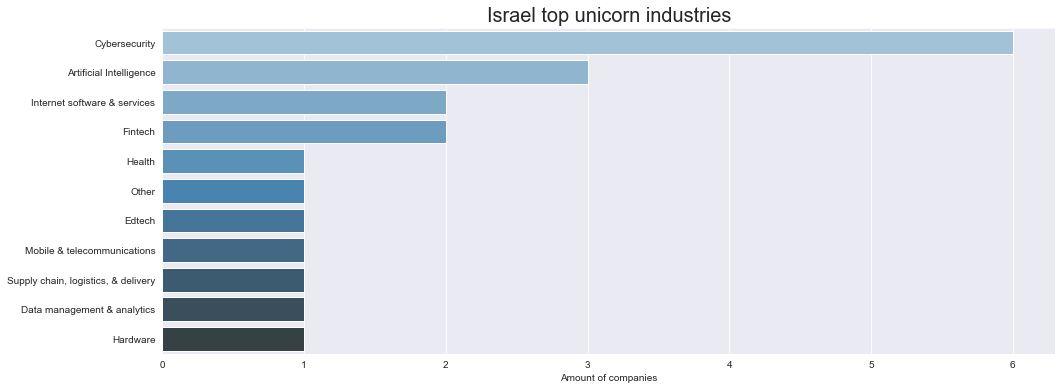

In [55]:
plt.figure(figsize= (16, 6))
sns.countplot(y='Industry',data= israel_df,palette="Blues_d",order = israel_df['Industry'].value_counts().index)  
plt.ylabel('')
plt.xlabel('Amount of companies')
plt.title('Israel top unicorn industries',fontsize=20)
plt.show()

Unlike the rest of the world in Israel, the most powerful industries are Cyber secuirty and Artificial intelligence.

<div>
<img src="https://raw.githubusercontent.com/ronro5353/DataAriel/main/cyber.jpg" width="800"/>
</div>

<AxesSubplot:xlabel='Valuation ($B)', ylabel='Company'>

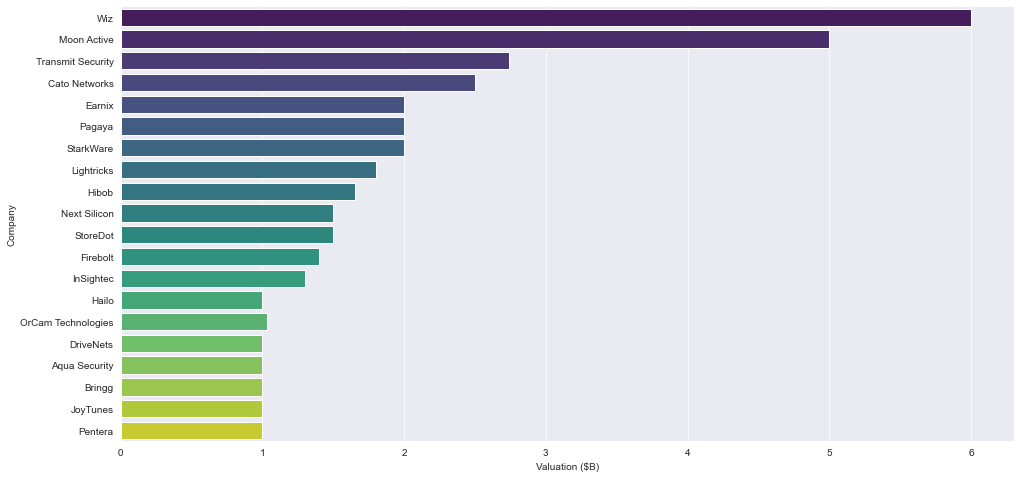

In [56]:
sns.barplot(data=israel_df,x='Valuation ($B)',y='Company',palette="viridis")

The leading company in Israel is Wiz.

Wiz is a start-up company for securing activity in the cloud computing, and its the Israeli company that has become a "unicorn" in the shortest period of time since its establishment.

# Country quality

In [57]:
top_country_val = unicorn_df.groupby('Country')[['Valuation ($B)']].sum().reset_index().sort_values('Valuation ($B)', ascending= False)
top_country_val=top_country_val.head(10)
top_country_val

,Country,Valuation ($B)
42,United States,1829.74
8,China,572.69
18,India,187.05
41,United Kingdom,177.68
16,Germany,66.70
36,Sweden,60.52
1,Australia,50.60
15,France,49.87
6,Canada,49.03
21,Israel,38.42


In [58]:
url2='https://raw.githubusercontent.com/ronro5353/DataAriel/main/2022_population.csv'
population_df = pd.read_csv(url2)
population_df.head()

,iso_code,country,2022_last_updated,2020_population,area,density_sq_km,growth_rate,world_%,rank
0,CHN,China,"1,447,775,627","1,439,323,776","9,706,961 sq_km",149/sq_km,0.29%,18.21%,1
1,IND,India,"1,404,483,085","1,380,004,385","3,287,590 sq_km",428/sq_km,0.95%,17.68%,2
2,USA,United States,"334,494,490","331,002,651","9,372,610 sq_km",36/sq_km,0.57%,4.21%,3
3,IDN,Indonesia,"278,682,431","273,523,615","1,904,569 sq_km",147/sq_km,1.00%,3.51%,4
4,PAK,Pakistan,"228,793,102","220,892,340","881,912 sq_km",260/sq_km,1.90%,2.89%,5


In [59]:
population_df.rename(columns = {'country':'Country','2022_last_updated':'2022_population'}, inplace = True)
pop_df=population_df[['Country','2022_population']]
pop_df

,Country,2022_population
0,China,"1,447,775,627"
1,India,"1,404,483,085"
2,United States,"334,494,490"
3,Indonesia,"278,682,431"
4,Pakistan,"228,793,102"
...,...,...
219,Montserrat,"4,965"
220,Falkland Islands,"3,539"
221,Niue,"1,622"
222,Tokelau,"1,378"


In [60]:
merged_df = top_country_val.merge(pop_df, on='Country')

In [61]:
merged_df["2022_population"] = merged_df["2022_population"].str.replace(',','')
merged_df =merged_df.astype({"2022_population": float})
merged_df.dtypes
merged_df['Country_Qual']=merged_df['Valuation ($B)']*(10**9)//merged_df['2022_population']
merged_df.head()

,Country,Valuation ($B),2022_population,Country_Qual
0,United States,1829.74,3.344945e+08,5470.0
1,China,572.69,1.447776e+09,395.0
2,India,187.05,1.404483e+09,133.0
3,United Kingdom,177.68,6.844861e+07,2595.0
4,Germany,66.70,8.387765e+07,795.0


In [62]:
merged_df=merged_df.sort_values('Country_Qual',ascending=False)

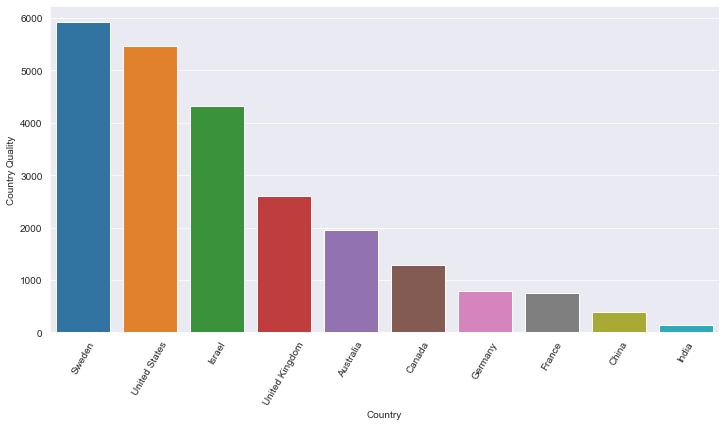

In [63]:
plt.figure(figsize= (12, 6))
sns.barplot(x= 'Country',y= 'Country_Qual',data= merged_df)           
plt.ylabel('Country Quality')
plt.xticks(rotation=60)
plt.show()

$WOW!$

israel is in the top 3 countries in the quality index

<div>
<img src="https://raw.githubusercontent.com/ronro5353/DataAriel/main/Flag_of_Israel.svg" width="300"/>
</div>

# conclusion

1.The industry with the highest value in the world is fintech industry, and in Israel it is cyber security industry.

2.Most of the companies have become unicorn within 4 to 12 years.

3.According to the data, there has been a crazy prosperity of Unicorn companies in recent years.

4.Israel is a leading country in establishment of Unicorn companies.


# Thanks for listening